In [23]:
#from Thesis.util.csv_visualisation import *
from Thesis.util.hdf5_visualisation import *

In [24]:
problem_names = ['DTLZ2']#, 'DTLZ3', 'JUSTICE']
moeas = ['eps_nsgaii']#, 'borg', 'generational_borg']
core_count = [4]
seeds = 1
metric_names = ['hypervolume', 'generational_distance', 'epsilon_indicator', 
               'archive_size', 'spread', 'spacing', 'time_efficiency', 'epsilon_progress']

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

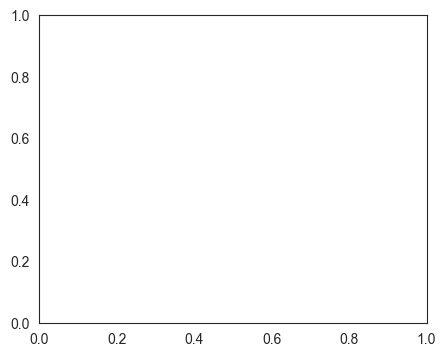

In [25]:
plot_metrics_by_cores(problem_names, moeas, core_count, seeds, metric_names)

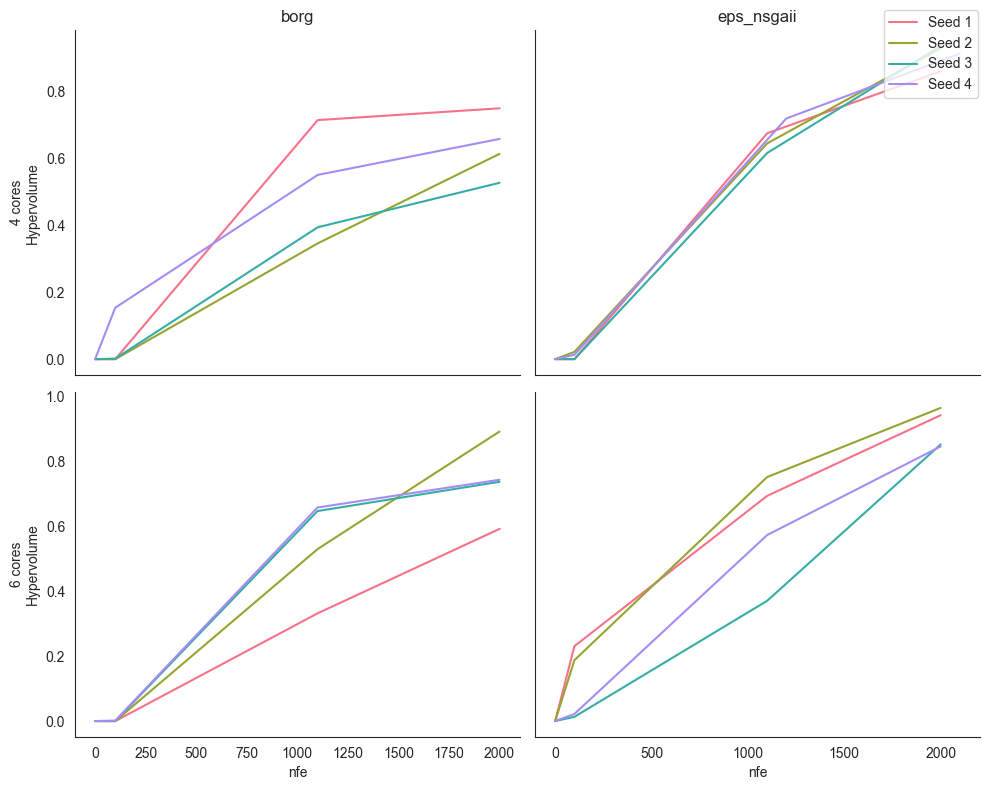

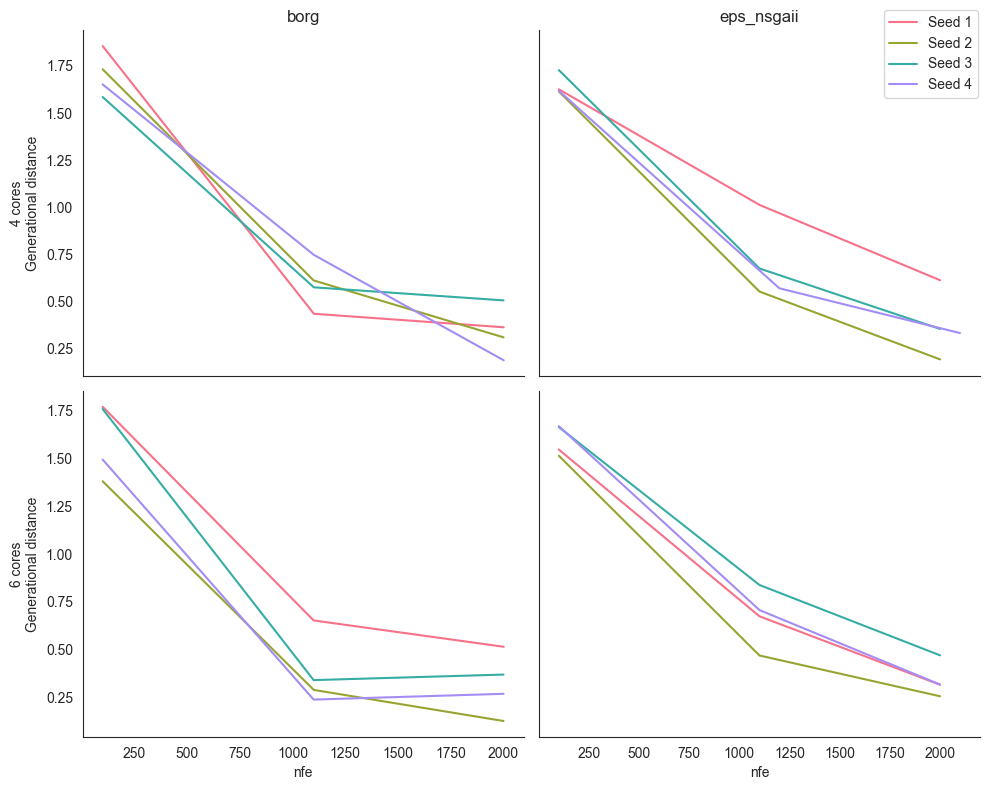

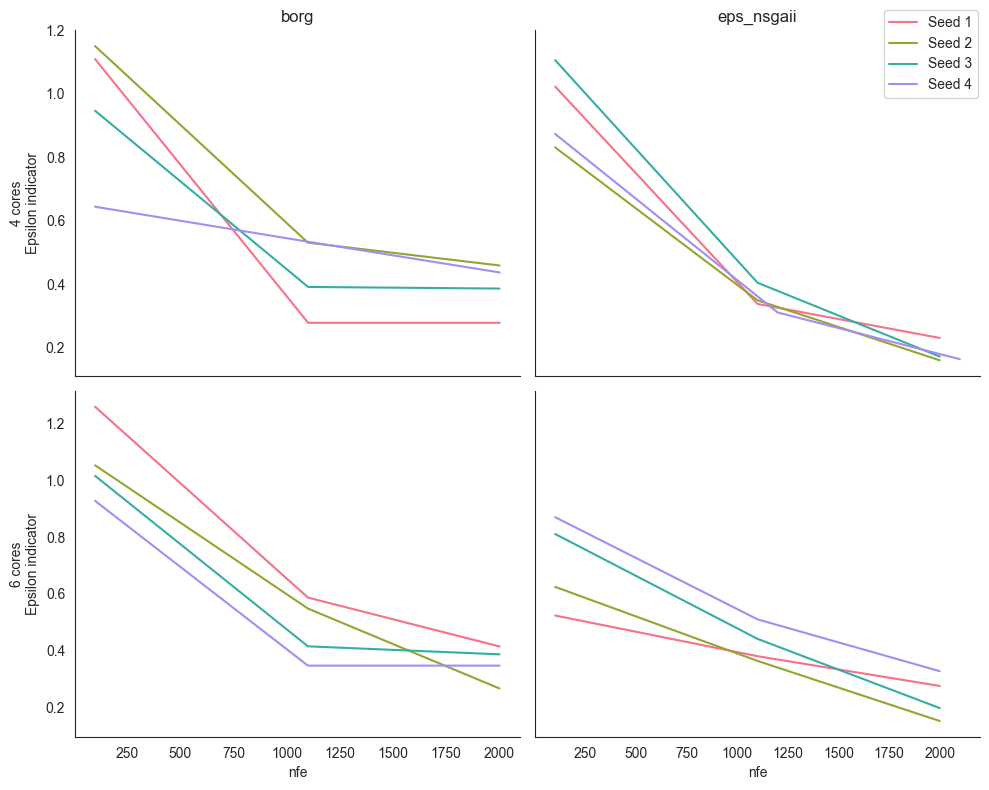

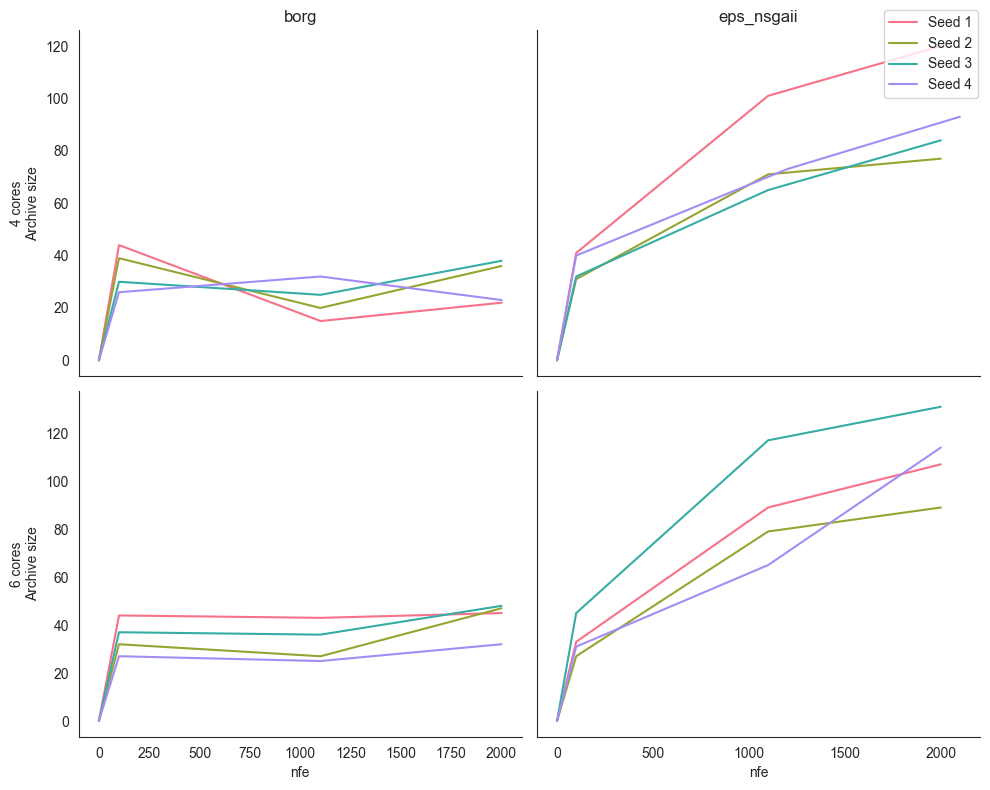

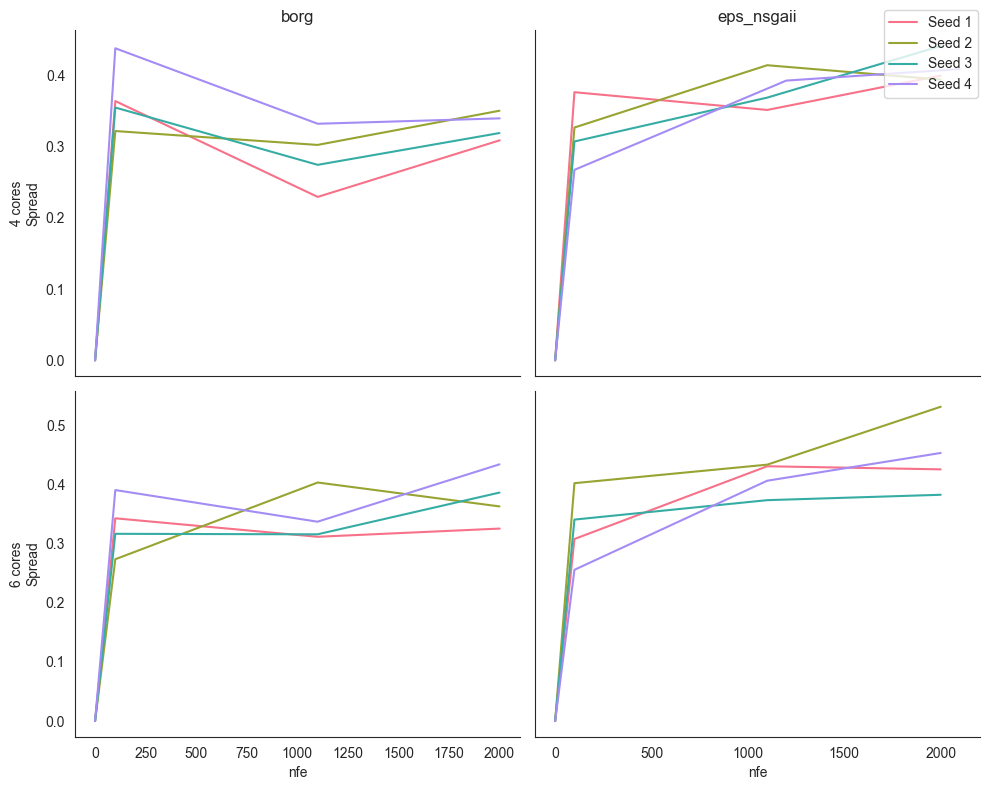

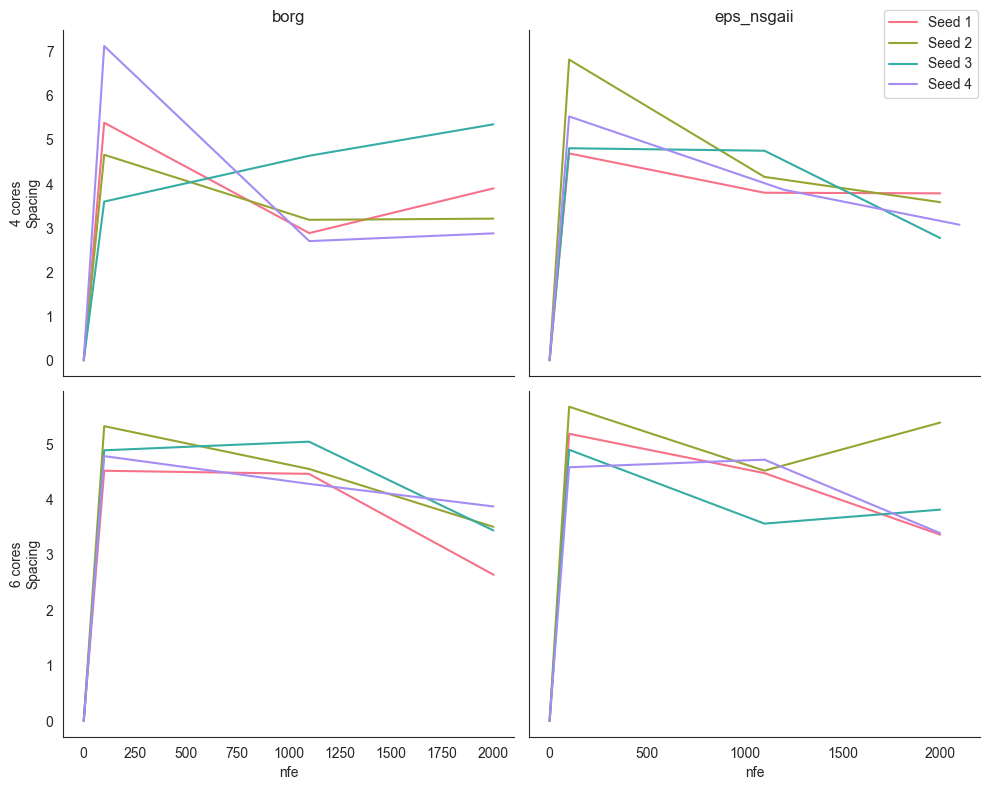

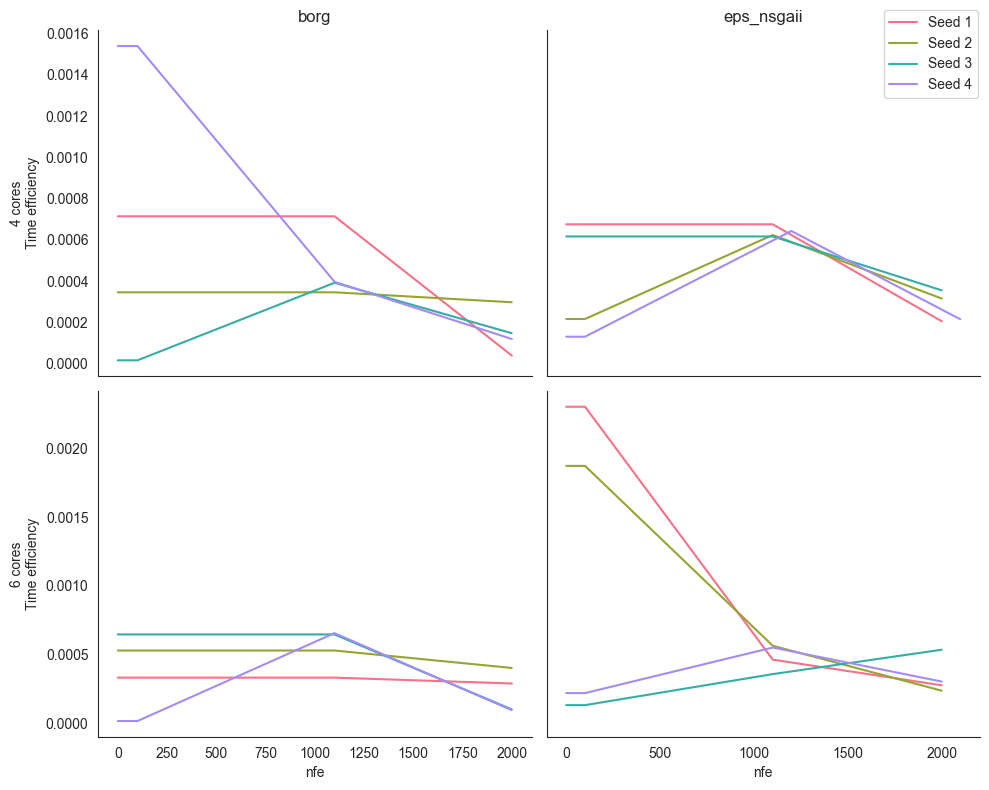

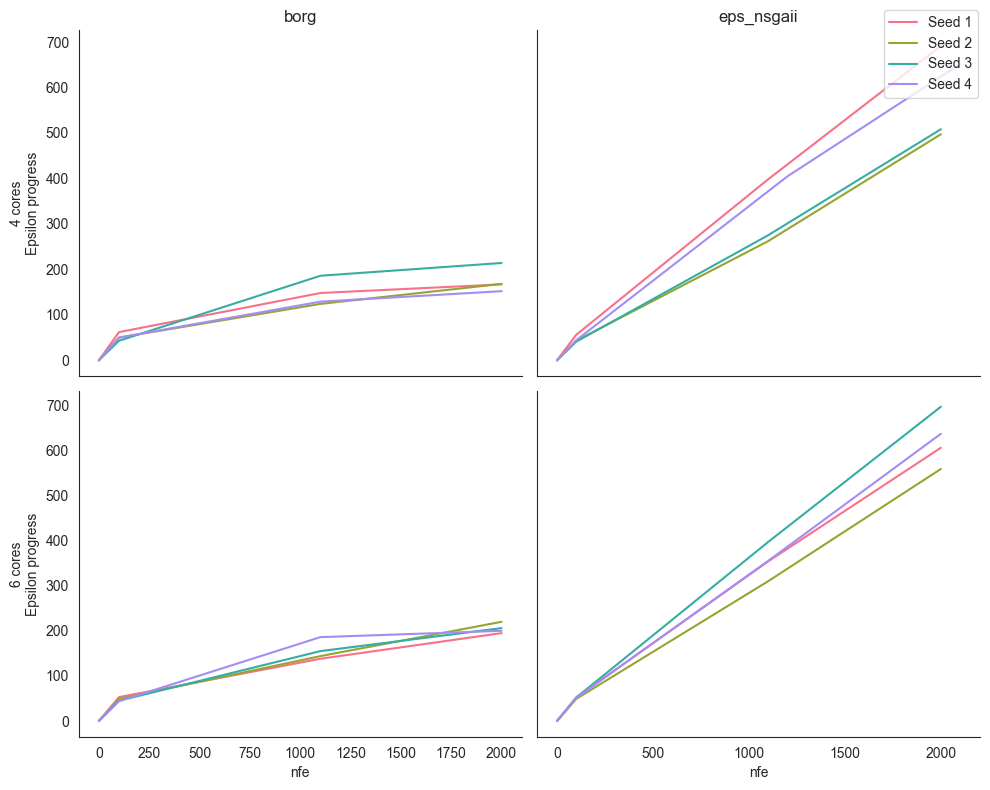

In [13]:
plot_metrics_by_cores('DTLZ3', moeas, core_count, seeds, metric_names)
plt.show()

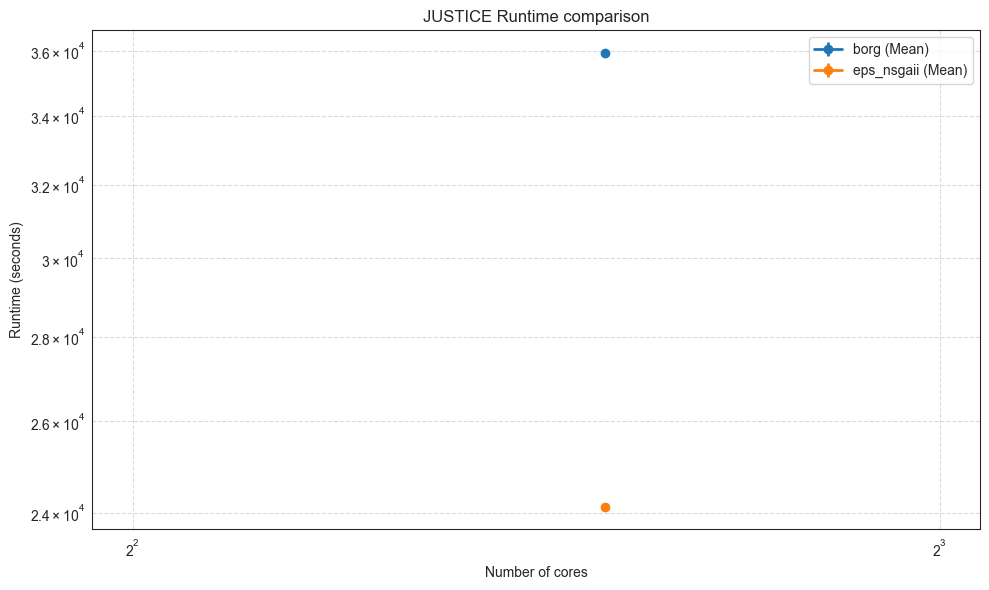

In [4]:
plot_runtime_comparison('JUSTICE', moeas, core_count, seeds)
plt.show()

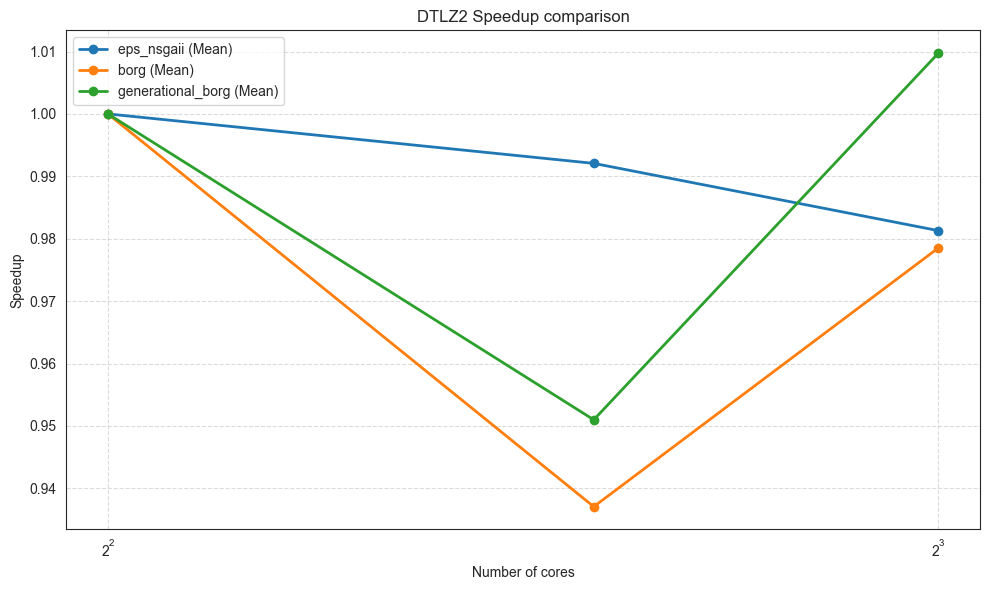

In [18]:
plot_speedup_comparison('DTLZ2', moeas, core_count, seeds)
plt.show()

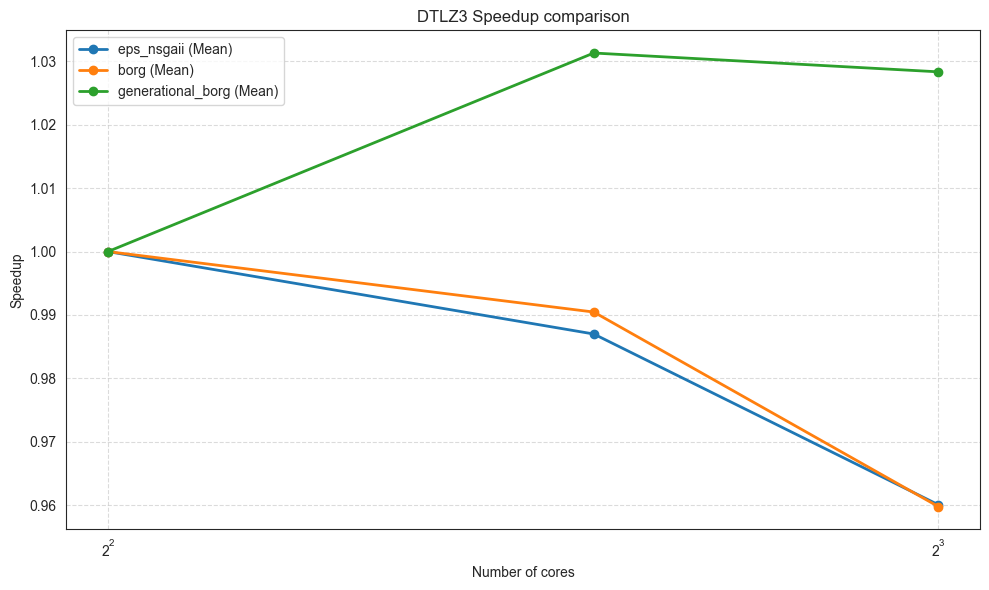

In [19]:
plot_speedup_comparison('DTLZ3', moeas, core_count, seeds)
plt.show()

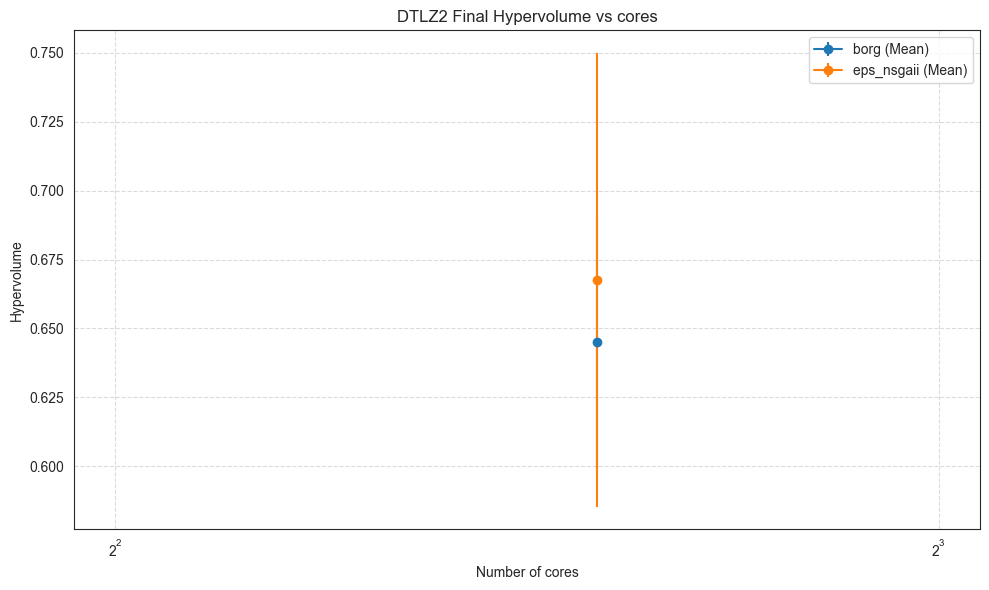

In [12]:
plot_final_metric_comparison('DTLZ2', moeas, core_count, seeds, 'hypervolume')
plt.show()

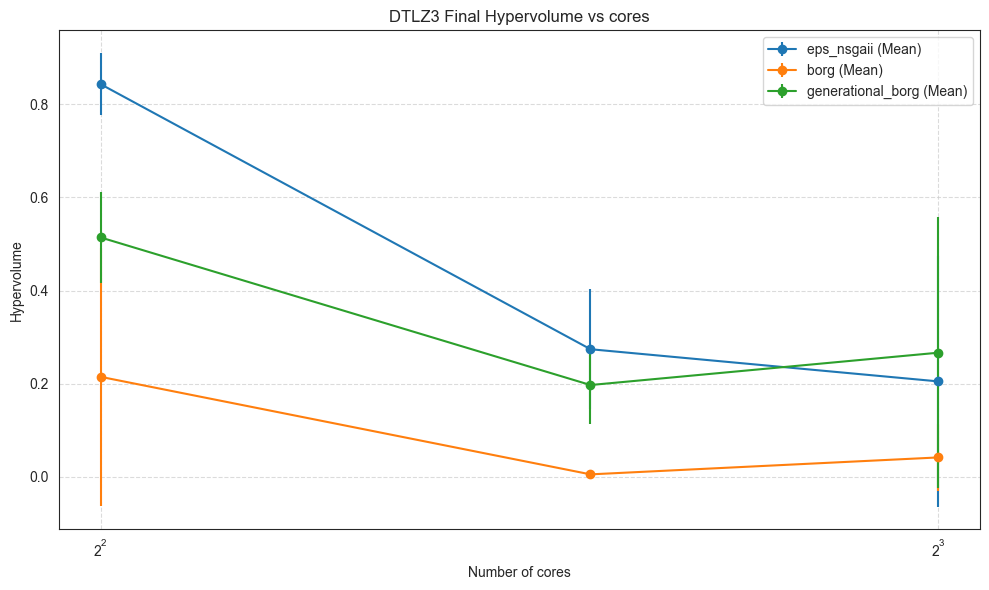

In [22]:
plot_final_metric_comparison('DTLZ3', moeas, core_count, seeds, 'hypervolume')
plt.show()

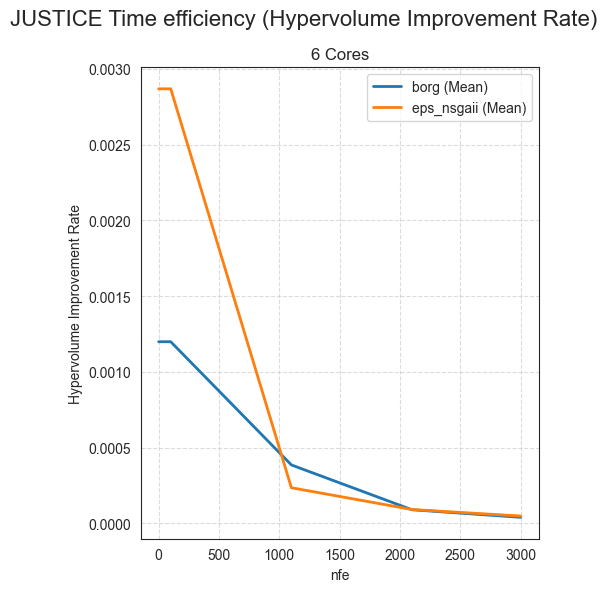

In [5]:
plot_hypervolume_efficiency('JUSTICE', moeas, core_count, seeds)
plt.show()

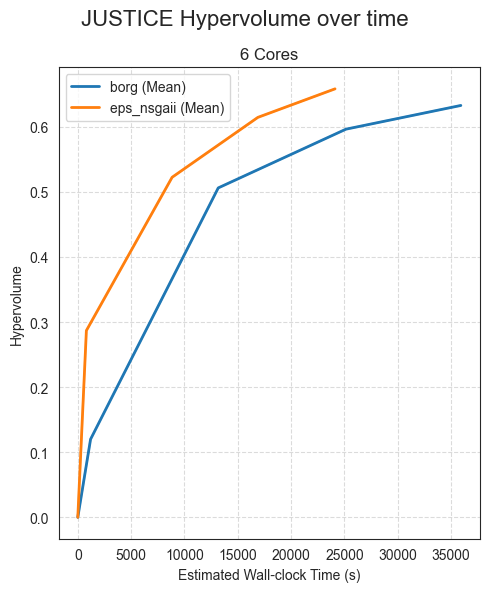

In [6]:
plot_hypervolume_over_time('JUSTICE', moeas, core_count, seeds)
plt.show()